<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 3*

---

# Deep Learning for sequence data

# 🏆 학습 목표

- <a href="#p1">Part 1: </a> 자연어 예측방법에 대해서 이해하기
  * Word2Vec - CBOW, Skip-gram
  * NNLM - Neural Network Language Model
  * RNNLM - Recurrent Neural Network Language Model

- <a href="#p2">Part 2: </a> 시퀀스 모델링에 사용되는 신경망에 대해서 배운다.
  * 시퀀스 : 순서가 있는 데이터의 집합
  * RNN 계열 (LSTM, GRU 포함)과는 다른 시퀀스 처리 방식인 Transformer에 대해서 알고 있다.
  * Keras를 사용하여 텍스트 생성 문제에 LSTM 적용해본다.
  * RNN을 실전문제에 사용해보았고, RNN도 기존 신경망과 다르지 않고 충분히 해결할 수 있다는 자신감을 갖는 것. 



### Warm up

예측기반의 방법이란 신경망 구조나 또는 다른 모델을 통하여 특정 문맥에서 어떤 단어가 나올지를 예측하면서 단어를 벡터로 만드는 방식입니다. 예측방법에는 Word2Vec, Neural Network Language Model(NNLM), 
Recurrent Neural Network Language Model(RNNLM) 등이 있습니다. <br>
 $\space$ Word2Vec는 CBOW, Skip-gram 2가지 모델로 나눌 수 있는데, 이는 서로 반대의 개념이라고 생각할 수 있습니다. CBOW(Continuous Bag of Words)의 경우는 어떤 단어를 문맥 안의 주변 단어들을 통해서 예측하는 방법이고, 반대로 Skip-gram의 경우에는 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 방법입니다. 

영상을 통해서 해당 내용을 좀 더 자세히 살펴봅시다.
- [Word2Vec](https://www.youtube.com/watch?v=UqRCEmrv1gQ)


기존에 배웠던 카운트 기반 방법으로 만든 단어 벡터보다 단어 간의 유사도를 잘 측정한다. 또한 단어들의 복잡한 특징까지도 잘 잡아낸다. 이렇게 만들어진 단어 벡터는 서로에게 유의미한 관계를 측정할 수 있다는 점이 놀랍다. 
- 왕(king) - 남자(man) + 여자(woman) = 여왕(queen)
- 아빠(father) - 남자(man) + 여자(woman) = 엄마(mother)

위와같은 법칙이 성립하도록 만드는 것이다

<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png"/>

---
- [RNN, LSTM 원리 소개 영상](https://youtu.be/SoNtAjxA3Jo?t=116)
  * Vanishing Gradient 개념을 이해하고, 그것을 극복하기 위해서 한 것은?
  * Gate의 개수와 범위는?
- [GRU 소개영상](https://youtu.be/cs3tSnAsyRs?t=2569)
  * Gate의 수를 줄일 수 있지 않을까? LSTM과의 차이는?
  * Reset/Update Gate - Vanishing Gradient 를 해결한 방법이 어떻게 달라졌나?
- 신호처리(음성, 사진, 동영상)의 개념 [DSP강의](http://www.kocw.net/home/search/kemView.do?kemId=334394&ar=relateCourse)(이런 게 있다... 강의를 듣진 마세요. 나중에 관련 업무를 하게되고 충분한 시간이 있을 때면 봐도 좋습니다)
  * 분석(analysis) - 레이더(RADAR, RAdio Detection And Ranging), 소나(SONAR, SOund NAvigation Ranging), 
  * 처리(processing)
  * 합성(synthesis)

---

#자연어 예측방법에 대해서 이해하기



## 문서를 벡터로 만들기 위해 단어 임베딩을 사용해 봅시다

지난 시간에 배웠던 BoW와 달리 Word2Vec과 같은 단어 임베딩 방법은 문맥(context)정보를 보존하는 특징이 있습니다. 

BoW는 단어의 존재 여부와 그 빈도 정보를 중요하게 다루는 대신 단어의 순서 정보를 무시하여 단어 주변 문맥정보를 잃어버린다는 단점이 있습니다.

이와 달리 단어 임베딩 방법중 하나인 Word2Vec은 문장에서 인접한 단어들의 정보를 중요시 하여 벡터화할 때 문맥 정보를 보존합니다. 그래서 의미적 또는 구조적으로 비슷한 사용법을 가진 단어들을 알 수 있게 됩니다.

#### *임베딩이란?*
자연어를 컴퓨터가 이해할 수 있는 수의 나열인 벡터 형태로 바꾸는 과정 또는 결과를 의미합니다. 앞서 살펴본 BoW 방법들은 문서를 벡터화 한 것이라 볼 수 있습니다. 

### Word2Vec 이란?
Word2Vec은 구글 연구팀이 발표한(Mikolov et al., 2013) 기법으로 가장 널리 쓰이는 단어 임베딩 모델 중 한 가지 입니다. 단어 임베딩 방법으로는 skip-gram과 CBOW 두 모델이 제안되었습니다. 

#### 분포가설(Distributional Hypothesis)

Word2Vec이 어떻게 문맥 정보를 보존하는지 이해하려면 분포가설([Distributional Hypothesis](https://en.wikipedia.org/wiki/Distributional_semantics))을 알아야 합니다. 
분포가설은 비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 지닌다는 것 입니다. 여기서 분포(distribution)란 특정 윈도우(window) 범위 안에 동시에 등장하는 이웃 단어나 문맥의 집합을 말합니다. 

예를 들어 두 문장

- I found **good** stores.
- I found **bad** stores.

에서 **good**과 **bad**은 주변에 분포한 문맥 단어들이 매우 유사함으로 추축하건데 비슷한 의미를 지닐 것이다 라고 가정하는 것 입니다.

> "You shall know a word by the company it keeps" - John Firth

### Word2Vec을 구현하는 방법으로 Skip-Gram을 살펴보겠습니다

CBOW, Skip-Gram은 Word2Vec을 구현하는 두 가지 방법입니다.

<img src="https://www.researchgate.net/publication/304163783/figure/fig11/AS:668313973698561@1536349876279/Neural-Network-Architecture-for-CBoW-and-Skip-Gram-Model.ppm"/>

여기서는 Skip-Gram만 살펴 보겠습니다

<img src="http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png" width="800" />

위 그림은 Skip-Gram 신경망 모식도 입니다.([Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/))

입력으로 원핫인코딩된 단어벡터가 들어오고 출력부분에서는 입력단어와 다른 모든 단어들이 문맥 단어일 확률값을 계산하게 됩니다.

신경망 학습을 위해서는 학습데이터를 구성하는 방법이 중요한데,

Skip-Gram 모델은 만들어진 학습데이터에서 타겟단어를 입력받아 주변 단어를 예측하는 과정에서 학습이 됩니다.


예를 들어서 **"The tortoise jumped into the lake"** 라는 문장이 있고 윈도우 크기가 2인 경우 다음과 같이 skip-Gram을 학습하기 위한 데이터 쌍을 구축할 수 있습니다.

* 타겟: **The**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (the, tortoise), (the, jumped)
* 타겟: **tortoise**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (tortoise, the), (tortoise, jumped), (tortoise, into)
* 타겟: **jumped**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (jumped, the), (jumped, tortoise), (jumped, into), (jumped, the)
* 타겟: **into**, 주변 문맥단어: tortoise, jumped
    * 학습 샘플: (into, tortoise), (into, jumped), (into, the), (into, lake)
                    ...

이런 방법으로 학습 데이터를 만들면 다음과 같은 데이터쌍이 만들어 집니다. 타겟단어를 입력으로, 문맥단어를 레이블로 하여 classification 학습을 진행한다고 생각하시면 됩니다. 전체 코퍼스에서 단어별로 슬라이딩하여 가능한 학습데이터를 모두 생성하고 신경망을 학습합니다.

|타겟단어|문맥단어|
|---------|---------|
|the|tortoise|
|the|jumped|
|tortoise|the|
|tortoise|jumped|
|tortoise|into|
|jumped|the|
|jumped|tortoise|
|jumped|into|
|jumped|the|
|into|tortoise|
|into|jumped|
|into|the|
|into|lake|
|...|...|

학습이 다 끝난 후 은닉층의 가중치가 임베딩벡터의 차원이 됩니다. 은닉층의 노드 수를 조절하여 임베딩벡터의 차원을 조절할 수 있겠지요.
<img src="https://i.imgur.com/1ETMljf.png" width="600" />

학습과정에서 효율을 높이기 위해 사용하는 기법들이 있지만 지금은 아직 신경망을 배우기 전이기 때문에 너무 깊게 들어가지 않겠습니다.

결과적으로 skip-gram 모델을 통해 결과로 단어 임베딩 벡터들을 얻게되어 단어, 문장들 간의 관련도 계산, 문서 분류같은 작업에 사용될 수 있습니다.

CountVectorizer, TF-IDF을 사용할 때 문맥정보를 보기위해 할 수 있는 최선의 방법은 bi-gram, tri-grams 같은 n-gram을 사용하는 것이었습니다. 하지만 skip-grams은 그 이상을 넘어 보다 강력한 문맥 정보를 제공해 줄 수 있습니다.


#### CBOW(Continuous Bag of Words)

Word2Vec을 구현하는 방법 중 CBOW는 skip-gram과 반대로 주변에 있는 문맥단어들을 가지고 타겟 단어 하나를 맞추는 과정을 통해 학습이 이루어 집니다.
예를 들어 입력이 (jumped, the, lake) 일 때 타겟 단어로 'into' 를 예측하며 학습을 합니다.  

하지만 Skip-gram이 같은 코퍼스를 사용했을 때 더 많은 학습 데이터를 만들어 낼 수 있기 때문에 임베딩 결과의 품질이 CBOW 보다 좋은 것으로 알려져 있습니다.



#### 그럼 임베딩 모델 학습은 어떻게 해야 할까요?
Word2Vec을 학습시키기 위해서는 충분히 큰 코퍼스를 학습시켜야 한다는 것을 알 수 있습니다. 다행인 것은 이미 충분히 큰 코퍼스들로 학습된 단어 임베딩을 쉽게 찾아 사용할 수 있다는 것입니다. 여러분이 지금까지 사용해온 Spacy 라이브러리의 모델도 Word2Vec 와 유사한 방식으로 학습한 임베딩을 제공합니다. 무지막지하게 큰 [Common Crawl](https://en.wikipedia.org/wiki/Common_Crawl) 데이터를 학습에 사용해 만든 모델이기 때문에 영어의 경우 충분히 대표성을 가진 임베딩이 나올 수 있을 것이라 생각할 수 있겠습니다.

이제 spacy를 통해 임베딩을 어떻게 사용하는지 살펴 봅시다.

In [ ]:
tokens = nlp("Dogs and cats school gagasdf")

# vector_norm: 벡터의 크기
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm)

Dogs True 7.193099
and True 4.6577983
cats True 6.933004
school True 6.7380905
gagasdf False 0.0


입력한 문장에 대한 임베딩 벡터를 얻습니다.

In [ ]:
vects = tokens.vector
print(vects)

[-1.79408014e-01  1.26198798e-01 -1.11785397e-01 -2.83820003e-01
 -2.62799971e-02  5.58035970e-02 -1.45570010e-01 -5.27487993e-02
  1.69332191e-01  1.93045998e+00 -2.79807180e-01  1.38399795e-01
 -1.85558006e-01  5.02085984e-02 -1.40728995e-01  9.67558026e-02
  2.06080005e-01  8.19686055e-01 -1.57560199e-01 -6.11754060e-02
 -1.73499614e-01 -1.09055400e-01 -4.25813980e-02 -2.84800589e-01
  1.65506005e-01 -9.49792042e-02 -2.45875999e-01 -1.76592007e-01
  1.02721252e-01 -1.18426010e-01 -9.64230075e-02  2.92337183e-02
 -8.17720070e-02 -2.63900049e-02  2.31444001e-01  9.93599277e-03
  1.33631989e-01 -2.89353997e-01  8.05701874e-03  2.12559611e-01
  1.11464588e-02  1.04168795e-01  6.81307912e-03 -1.94971208e-02
  7.46979937e-02 -9.89580080e-02 -2.04918385e-01  1.74181998e-01
  1.38363212e-01 -1.74419403e-01 -8.65179971e-02 -2.17613988e-02
  1.88542008e-02  4.70872000e-02 -9.22998041e-02  2.23565191e-01
 -3.33181992e-02  6.36455938e-02 -2.20621794e-01  3.23160827e-01
  7.06618130e-02 -1.33299

In [ ]:
# 벡터의 차원을 보겠습니다
len(vects)

300

In [ ]:
# 두 문서를 만들어 코사인 유사도를 측정해 보겠습니다
doc1 = nlp("I found a wonderful restaurant")
doc2 = nlp("the food is delicious")

similarity = doc1.similarity(doc2)
print(similarity)

0.792971253536227


In [ ]:
doc3 = nlp("The restaurant we found yesterday is wonderful")

print(doc1.similarity(doc3))

0.9173849797280267


In [ ]:
car = nlp('car')
bus = nlp('bus')
human = nlp('human')
monkey = nlp('monkey')
lion = nlp('lion')
gorilla = nlp('gorilla')
avengers = nlp('avengers')
marvel = nlp('marvel')

print('car vs bus : ', car.similarity(bus))
print('bus vs human : ', bus.similarity(human))
print('human vs monkey : ', human.similarity(monkey))
print('human vs lion : ', human.similarity(lion))
print('monkey vs gorilla : ', monkey.similarity(gorilla))
print('avengers vs marvel : ', avengers.similarity(marvel))

car vs bus :  0.4816960149829203
bus vs human :  0.12412277316164501
human vs monkey :  0.39899946231157096
human vs lion :  0.27611871750909667
monkey vs gorilla :  0.6525881793034227
avengers vs marvel :  0.5988409089010447


### PCA를 사용한 벡터 시각화
300 차원인 벡터들은 시각화 하기 어렵기 때문에 PCA를 사용해 2차원으로 변환해 보겠습니다.

In [ ]:
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # 단어 벡터로 변환합니다
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'bus', 'human', 'man', 'woman', 'monkey', 'fish' , 'shark', 'lion', 'tiger', 'avengers', 'marvel', 'thor', 'comics', 'superhero']

# PCA 모델의 차원을 설정하여 
pca = PCA(n_components=2)

# Fit & Transform
word_vect_2d = pca.fit_transform(get_word_vectors(words))

# 각 벡터가 300 차원에서 2차원으로 줄어 든 것을 확인 할 수 있습니다
word_vect_2d

array([[-3.66200993, -3.32131749],
       [-3.546578  , -2.85085021],
       [-1.79310422, -3.71355107],
       [-3.06282644, -2.17552236],
       [-0.32817602,  1.3725565 ],
       [-1.07378983,  0.56357398],
       [-1.38479131,  0.34247838],
       [-0.32481679,  2.04812646],
       [-1.69068704,  3.8972493 ],
       [-0.79176752,  3.43002251],
       [-0.28481803,  2.75749512],
       [-0.77280682,  3.10963932],
       [ 4.97271183, -1.21201458],
       [ 2.90881958, -0.6911009 ],
       [ 3.43790293, -1.18524999],
       [ 3.76755523, -1.36028237],
       [ 3.62918236, -1.0112526 ]])

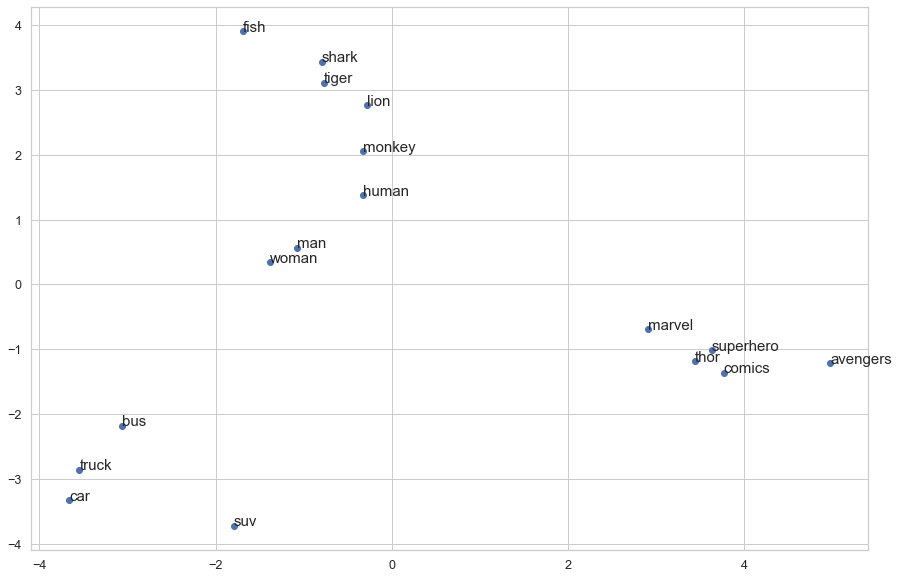

In [ ]:
# 결과가 잘 보이도록 크기를 설정합니다
plt.figure(figsize=(15,10))

# 단어벡터를 그립니다
plt.scatter(word_vect_2d[:,0], word_vect_2d[:,1])

# 점 옆에 단어를 표시합니다
for word, coord in zip(words, word_vect_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

plt.show()

In [ ]:
# 벡터 연산을 통해 단어간의 관계를 추론할 수 있습니다

from scipy.spatial.distance import cosine

king = nlp("king").vector
queen = nlp("queen").vector
man = nlp("man").vector
woman = nlp("woman").vector

# 단어벡터가 의미를 가진다면 다음과 같은 연산을 통해 result는 queen과 비슷한 뜻이 되겠지요?
result = king - man + woman

print("similarity between queen and (king - man + woman) : ", 1 - cosine(queen, result))

similarity between queen and (king - man + woman) :  0.7880843877792358


### 문서에서 벡터화 하여 KNN으로 검색해 보겠습니다.

Spacy를 사용해 문서를 임베딩 하겠습니다.

In [ ]:
X = [nlp(str(d)).vector for d in data]

In [ ]:
pd.DataFrame(X).shape

(401, 300)

단어 queen 과 가장 유사한 단어를 찾아 보겠습니다.

In [ ]:
import numpy as np
most_similar= nlp.vocab.vectors.most_similar(np.array([queen]), n=10)

In [ ]:
# return tuple: (keys, best_rows, scores)
most_similar

(array([[ 5247273317732208552,  4176741725343376093, 10168488388102651113,
         15897987006174384596,  6350019949300993244,  6861946004817705414,
         13176088972490086564,  7102492827649024548,  7464393751932445219,
         14826469074451677028]], dtype=uint64),
 array([[ 59856,   6026,   5310,  11962,  16454, 172357, 391588,  27270,
           3150,   2183]], dtype=int32),
 array([[1.    , 1.    , 1.    , 0.7322, 0.7322, 0.7322, 0.7253, 0.7253,
         0.7253, 0.7253]], dtype=float32))

In [ ]:
most_similar[0][0]

array([ 5247273317732208552,  4176741725343376093, 10168488388102651113,
       15897987006174384596,  6350019949300993244,  6861946004817705414,
       13176088972490086564,  7102492827649024548,  7464393751932445219,
       14826469074451677028], dtype=uint64)

In [ ]:
for key in most_similar[0][0]:
    print(nlp.vocab[key].text,)

QUEEN
queen
Queen
queens
Queens
QUEENS
KIng
KING
king
King


문서 임베딩 벡터로 NN 모델을 학습합니다.

In [ ]:
nn_spacy = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn_spacy.fit(X)

NearestNeighbors(algorithm='kd_tree')

Tfidf 벡터로 찾은 0번째 문서와 가장 유사한 문서 5개를 보겠습니다.

In [ ]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 0.        , 1.10314436, 1.12437104, 1.15991512]]),
 array([[  0,  62,  92, 297, 300]]))

Spacy 임베딩 모델로 찾아 봅시다.

In [ ]:
nn_spacy.kneighbors([X[0]])

(array([[0.        , 0.        , 0.49605979, 0.50772691, 0.50784463]]),
 array([[62,  0, 92, 83, 52]]))

문서62는 문서0과 동일하고 그 외, 문서 92를 가장 가깝다고 합니다.

In [ ]:
print(data[0][:150],'\n')
print(data[92][:150])

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m" 

b'Finding new homes for old phones\n\nRe-using old mobile phones is not just good for the environment, it has social benefits too.\n\nResearch has found tha'


In [ ]:
# spacy
print(data[83][:150])

b'Looks and music to drive mobiles\n\nMobile phones are still enjoying a boom time in sales, according to research from technology analysts Gartner.\n\nMore'


In [ ]:
# tfidf
print(data[297][:150])

b"'Friends fear' with lost mobiles\n\nPeople are becoming so dependent on their mobile phones that one in three are concerned that losing their phone woul"


지금까지 자연어를 벡터로 표현하는 방법들에 대해 살펴보았습니다. Bag-of-Words 모델 중 단어의 출현 빈도를 사용해 텍스트 문서를 벡터로 변환하는 CounterVectorizer를 사용해 보았고, 문서별 단어의 빈도를 계산해 가중치를 적용한 TfidfVectorizer를 사용해 보았습니다.

이렇게 변환된 벡터는 코사인 유사도와 같은 방법을 통해 문서들 간 유사성을 수치로 나타낼 수 있었습니다. 문서들이 많을 때 코사인 유사도를 다 적용해서 가장 가까운 문서를 찾는 방법은 효율적이지 않습니다. 그래서 K-NN과 같은 트리 기반 알고리즘을 사용해 가장 가까운 K개의 문서를 빠르게 검색할 수 있었습니다.

BoW는 단어의 존재와 빈도를 중요시 여기는 대신 단어들의 순서정보를 무시하여 주변 문맥 정보가 없어지는 단점이 있었습니다. Word2Vec과 같은 담어 임베딩 방법은 벡터 생성 과정 중에 문맥 정보를 보존하여 유사한 의미를 가진 단어나 문장은 는 유사도가 큰 벡터가 됩니다.

---

여러분은 이미 머신러닝을 이용해 분류기를 학습시킬 수 있습니다. 그리고 텍스트 문서에서 어떻게 특성들을 추출하는지 배웠습니다. 이제 텍스트 문서를 분류하는 모델을 만들 차례 입니다!

## 텍스트에서 특성들을 추출하고 문서 분류기를 만들어 보겠습니다.

Sklearn 파이프라인을 사용하면 머신러닝 프로세스에 사용되는 여러 컴포넌트들을 쉽게 연결할 수 있었습니다.

이번에는 파이프라인을 이용해 코퍼스 입력, 차원 축소, 학습 프로세스를 진행해 보겠습니다.

벡터화 과정중에 n-gram 범위, 최대 토큰의 수 같은 하이퍼파라미터들을 수정해 가며 실험을 해 보아야 합니다.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

20개 뉴스그룹으로 분류된 18,000개의 뉴스그룹 문서 데이터셋 입니다.
- [20newsgroups](https://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset)
- 전자와 정치에 관한 두 개의 다른 카테고리 뉴스를 가져오겠습니다.


In [ ]:
categories = ['sci.electronics',
              'talk.politics.misc']

ng_train = fetch_20newsgroups(subset='train'
                             , remove=('headers', 'footers', 'quotes')
                             , categories=categories
                             )

ng_test = fetch_20newsgroups(subset='test'
                             , remove=('headers', 'footers', 'quotes')
                             , categories=categories
                             )

## Spacy 단어 임베딩을 사용합니다

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp("The tortoise jumped into the lake")

Spacy는 기본적으로 300차원으로 임베딩 합니다.

In [ ]:
len(doc.vector)

96

In [ ]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [ ]:
%%time
X_spacy = get_word_vectors(ng_train.data)

len(X_spacy) == len(ng_train.data)

CPU times: user 45.2 s, sys: 1.41 s, total: 46.6 s
Wall time: 46.7 s


In [ ]:
%%time
X_test_spacy = get_word_vectors(ng_test.data)

CPU times: user 27.1 s, sys: 884 ms, total: 28 s
Wall time: 28.1 s


랜덤포레스트로 학습해 보겠습니다.

In [ ]:
rfc.fit(X_spacy, ng_train.target)

In [ ]:
y_test_spacy = rfc.predict(X_test_spacy)
accuracy_score(ng_test.target, y_test_spacy)

#### MLP(Multi-layer perceptron classifier)를 간단히 사용해보겠습니다

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs'
                   , alpha=1e-5
                   , hidden_layer_sizes=(16,2)
                   , random_state=2
                   )

In [ ]:
clf.fit(X_spacy, ng_train.target)

In [ ]:
clf.get_params()

In [ ]:
y_test = clf.predict(X_test_spacy)
accuracy_score(ng_test.target, y_test_spacy)

---


# RNN

이전까지 신경망의 개념에서와 CNN에서의 전체적은 흐름은 비슷하였습니다. 흐름이 한 방향으로만 흐르는 피드포워드(Feed Forward, FF)인 신경망들이었습니다. 물론 신경망을 학습할 때에는 역방향으로 움직이는 역전파에 대해서 배웠지만, 이것은 학습하는 과정이었기 때문에 신경망을 실제로 사용할 때에는 순방향으로만 사용하였습니다. 입력 신호가 은닉층으로 전달되고, 또 다음 층으로 전달하고 이렇게 순차적으로 전달해왔습니다.  이렇게 FF는 구성이 단순하여 이해하기 쉽지만, 큰 단점이 하나 있습니다. 바로 시계열(순서의 패턴에 의미가 있는) 데이터를 다루지 못합니다. 기존에 우리가 다뤘던 네트워크의 구조가 시계열 형태의 패턴을 잡아내지 못하기 때문입니다. 그래서 오늘은 시계열의 데이터 성질(패턴)을 잡아낼 수 있는 순환신경망(RNN)에 대해서 배워보겠습니다.

시계열 데이터, 다른 말로 `시퀀스`는 열거 된 데이터입니다. 우리 일상에서는 `주문` 등의 반복적인 작업들이 이에 해당됩니다. Python 리스트(List)가 시계열 데이터의 좋은 예라고 할 수 있습니다. 두 개의 리스트 `[1, 2, 2, -1]`은 `[1, 2, -1, 2]`는 서로 다르다는 것입니다. 내용의 집합은 동일하지만, 순서가 다르면 다른 데이터가 될 수 있습니다. 이렇게 우리가 사용하는 데이터 구조 (예 : NumPy 배열)는 종종 이런 기본구조를 기반으로 구축되어 있죠.

일상생활에서 대표적인 예는 바로 우리의 '말'이죠. 말의 순서가 중요하죠. 문법이 그러한 법칙을 담고 있습니다. 이렇게 시계열 데이터는 순서뿐만 아니라 "시간" 축이라는 마커(표시)가 있는 데이터입니다. 날짜, 타임 스탬프, [Unix 시간](https://en.wikipedia.org/wiki/Unix_time) 등. 모든 시계열은 또한 시퀀스이며 일부 기술의 경우 항목이 "얼마나 멀리 떨어져 있는지"를 고려하기도 하고, 단순히 순서만 고려할 수 있습니다 (특히 일정한 간격으로 수집 된 데이터가 특히 일관된 경우 중요하지 않을 수 있음). 오늘 배울 기본적인 RNN의 경우는 `얼마나 멀리 떨어져 있는가`보다 `순서`가 더 중요할 수 있습니다. RNN은 먼 데이터를 기억조차 하지 못하기 때문이죠. 기본적인 개념을 배우고 나면, 꽤 먼 거리에 있는 데이터를 배울 수 있는 LSTM에 대해서도 배워볼 것이고, 시계열을 다루지만 RNN을 사용하지 않는 Attention Network에 대해서도 간단하게 배워볼 것입니다. 

# 확률과 언어모델 Review


## Word2Vec

단어를 Vector공간으로 변환시키는 방법이라고 배웠고, 의미를 되새기기 위해서 그림을 참조하면 다음과 같습니다. 
<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png"/>

 한편, 수식적으로 이라는 단어데이터를 생각해보겠습니다.<br>
> $w_1, w_2, w_3, ..., w_l$ 


 $w_l$을 `target`으로 예측해야한다고 했을 때, 기존의 맥락(context)과 이후 맥락을 반영해야겠습니다. <br>

 > $P(w_{l} | w_{l-1}, w_{l+1}$)

CBOW는 위 식의 사후확률을 나타냅니다. 좌우를 고려하지 않고, 좌측(과거)만 고려하면, 

 > $P(w_{l} | w_{l-1}, w_{l-2}$)

 이렇게 식을 만들어볼 수 있습니다. 이런 모델의 형태는 머신러닝이나 통계학에서 마르코프체인(Markov Chain)으로 다뤄지기도 합니다. 위 수식은 level2 마르코프체인이 되는 것입니다. 과거 2개만을 고려했다는 의미이죠. 이렇게 파라미터의 조절을 통해서 기존 머신러닝에서 다뤘던 내용들을 Word2Vec 충분히 커버할 수 있습니다. 이후 단어와 과거로 단어로부터 몇개씩 고려할 것인지도 하나의 하이퍼파라미터로 조절하는 것이죠. 이 변수를 과거를 $k$, 이후를 $j$라고 한다면, $k=2, j=0$인 경우를 다룬 것이고, $k=3, j=1$이라면 식은 다름과 같이 변경될 수 있는 것입니다.

  > $P(w_{l} | w_{l-1}, w_{l-2}, w_{l-3}, w_{l+1}$)

## 확률적 언어모델(Language Model)

> $P(w_1, ..., w_m) = P(w_m|w_1, ..., w_{m-1})P(w_{m-1}|w_1, ..., w_{m-2})...P(w_2|w_1)P(w_1)$

이렇게 최근에 나온 단어가 나오기까지의 사후확률은 위와같이 분해해서 쓸 수 있습니다. 이 확률은 동시에 연속적인 사건의 발생임으로 독립확률의 곱으로 동시확률을 나타냅니다. 

축약해서 하나의 기호로 쓰면 다음과 같습니다.
> $\prod _{t=1}^{m} P(w_t | w_1, ..., w_{t-1})$

이렇게 모델링한 것을 기준으로 다음 단어를 예측하게 되는 것입니다.

# 시퀀스를 위한 신경망

## RNN
"전통적인" 시계열 처리 방법은 많은 것(예, Markov Chains)들이 있지만 딥러닝 시대에 접어들면서 시퀀스 데이터에 대한 기술은 RNN으로 집중되었습니다. 기본적인 신경망에 재귀(recurrent)연결을 두면서 시간축 정보를 반영할 수 있도록 만든 구조입니다. 여기서 recurrent라는 단어는 라틴어에서 유래되었는데 '몇 번이나 반복해서 일어나는 일'이라는 뜻입니다. 우리말로는 '재발하다, 주직적으로 일어나다, 순환하다'는 의미로 번역될 수 있습니다.  따라서 오늘 배울 RNN은 무엇인가 순환하는 신경망이라는 것을 마음에 담고 시작해보겠습니다. 

시퀀스 데이터의 간단한 예시를 들어보겠습니다. `피보나치 수열`을 기억하십니까? 이전과 전전 단계의 합산으로 새로운 수열이 만들어지는 구조입니다. 앞서 언급된 2nd markov Chain도 이런 방식으로 $n-2$단계와 $n-1$단계로 $n$ 단계가 정해지는 예시를 들었는데 그 중에 둘의 합으로 표시하는 방법입니다. 이렇게 모델이 정해지면 다음으로 나올 무수히 많은 숫자들을 만들 수 있다는 이론에 근거합니다. 

> $F_n = F_{n-1} + F_{n-2}$

수학공식의 경우 기본 케이스 $ F_0 = 1, F_1 = 1 $라는 최초 입력이 필요하며 나머지는 알고리즘에 의해서 생성됩니다. 그러나 우리가 신경망에서 다룰 것은 루프(loop)형태를 다루게 됩니다. 그림으로 설명하면 다음과 같습니다.


![RNN, Recurrent neural network](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

화살표 왼쪽 그림에서 $h$ 라고 쓴 은닉층에 자기 자신의 입력으로 돌아가는 Edge $V$이 있습니다.이 루프는 지금 시점의 $t$의 출력을 위해서 $t-1$ 값이 $U$와 합쳐져 $h$에 다시 반영되는 것을 의미합니다. 

전체 네트워크가 왼쪽 그림처럼 표시되지만, 네트워크를 시점에 따라 이해하도록 펼쳐보면 오른쪽 그림처럼 주어진 $t-1$ 시점에서 $x_{t-1}$, $t$ 시점에서 $x_{t}$에서 그리고, $t+1$시점에서 $x_{t+1}$에서 어떻게 작동하는지 확인할 수 있습니다.





각 시각의 RNN 계층은 그 계층으로의 입력과 1개 전의 RNN 계층으로부터 출력을 받아들입니다. 이 두 데이터로 지금 시각의 출력을 다시 계산하게 됩니다. 
> $h_t = sigmoid(h_{t-1}W_h + x_tW_x + b)$

와 같은 형태로 계산할 수 있습니다. 이렇게 간단한 수식으로 변화내보면 조금 더 이해하기가 쉽습니다.  가중치가 2개가 생긴 것이죠. 입력 x를 h로 변환하기 위한 $W_x$와 RNN의 은닉층의 출력을 다음 h로 전환해주는 $W_h$가 있는 것입니다. 신경망에서 bias도 있다는 것은 잊지 않으셨으리라 생각합니다. 

In [ ]:
# 배웠던 RNN을 간단한 코드로 살펴보면 다음과 같습니다. 
import numpy as np

class RNN:
  def __init__(self, Wx, Wh, b):
    self.params = [Wx, Wh, b]
    self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
    self.cache = None

  def forward(self, x, h_prev):
    Wx, Wh, b = self.params
    t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
    h_next = np.sigmoid(t)

    self.cache = (x, h_prev, h_next)
    return h_next

개념을 설명할 때에는 복잡하고 어려워 보였지만, 코드로 구현하고 나면 사실 별 다른 게 없습니다. 쉽게 개념을 이해하고 넘어가시면 됩니다. RNN에서의 학습도 기존 신경망처럼 계산할 수 있는데, Backpropagation through time이란 표현을 이용하여 BPTT라고합니다. 순서대로 하나씩 계산을 할 수 있습니다. 

여기서의 문제점은 $V$의 반복이 문제가 됩니다. 만약 이 Recurrent가 100회, 1000회 반복된다고 보면, $V$의 100제곱, 1000제곱이 식 내부로 들어가게 될 것입니다. 1.1의 10제곱만해도 2.85배로 커지게 됩니다. 이렇게 발산하게되는 문제가 발생하게 되고, 한편 0.9의 제곱식을 고려하면, 무수히 작아지는 것을 볼 수 있습니다. 

>$V$의 크기를 적절하게 조절해주면 되지 않을까? 

라는 생각이 들기 시작합니다. 이렇게 $V$의 크기를 조절하는 Gate를 만들어서 적절히 조절해주면서 RNN을 조절해보자는 개념에서 출발한 것이 바로 LSTM입니다. 

## LSTM
이렇게 **RNN에 Gate를 추가한 모델을 LSTM**이라고 합니다. 요즘에는 단순한 RNN은 사용하지 않고 대부분 장기 단기 기억 장치 (LSTM)를 사용합니다.  지칭하는 이름 자체가 변하기도 하였는데요, 요즘 RNN이라고 하면 당연히 LSTM이나 이후에 배울 GRU를 지칭할 정도로 LSTM이 대표적인 RNN의 모델이 되었습니다. 오히려 전에 배운 RNN을 `기본적인 RNN`이라고 표현하기도 합니다. 

아래 그림은 그 단위 모듈에 대한 예시입니다.

"무언가 복잡해 보입니다. 한 블럭 안에서 많은 일이 진행되고 있습니다. 블럭 하나 안에 작은 신경망이 들어있다고 생각하시면 조금 쉽게 이해할 수 있습니다. 기존 신경망의 학습(역전파)에 대해서 배우며 기울기의 미분에 의해서 학습되는 개념을 배웠는데, 이 블럭 속에서도 같은 원리가 적용되며 역전파를 설계할 수 있습니다. 그러면 이 변화가 RNN과는 무엇이 다른가? 

**LSTM의 장점은 그 이름인 Long Short Term Memory 처럼 최근(short) 이벤트에 더 많은 비중을 둘수도 있으면서 동시에 오래된 (long) 정보를 완전히 잃지 않을 수 있다는 것**입니다. 과거 정보를 얼마나 유지할 것인지(forget gate), 새로 입력된 정보는 얼마만큼 활용할 것인지(input gate), 그리고 두 정보를 이용하여 얼마만큼 출력을 할 것인지(output gate)를 통해서 3가지 Gate의 비율만큼 정보를 끌어다가 쓸 수 있는 모델을 만들어낸 것입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F9905CF385BD5F5EC027F20"/>

위에서도 언급했지만, 충분한 반복(iterations) 후에 일반적인 신경망의 값이 너무 작아서 gradients가 제대로 전파되지 못하고, 0으로 수렴하는 문제(vanishing gradient)가 발생합니다. **[Gradient Vanishing 문제](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)라고 하며, RNN의 대표적인 문제로 유명합니다. 그것을 개선하기 위해서 LSTM의 gate들이 생겼다고 보실 수 있습니다.** 일상 생활의 예를 들어보면, 업무 대화를 하던 중에, 12시가 되면 Forget Gate를 빠르게 동작시켜서, 일 얘기를 중단하고 갑자기 점심을 뭐 먹을 지 생각하게 되고, 업무의 모든 것을 빠르게 잊어버리고 음식을 찾아 떠나게 만드는 역할을 수행하는 것입니다. 


점심시간이면 점심을 먹어야 한다고 알려주는 머신이라면 꽤 괜찮지 않습니까? LSTM을 사용하는 특히 매력적인 애플리케이션이 바로 언어 모델링입니다. 언어는 본질적으로 정렬 된 시퀀스 데이터입니다 (문자 / 단어가 차례로 이동하고 순서가 * 중요합니다 *). [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectness/)에 대해서는 한번 읽어보시면 좋습니다. 

LSTM 역전파 

<img src="http://i.imgur.com/2BZtc2l.gif" />

## GRU
Gated Recurrent Unit, GRU
한편, 이 LSTM의 간소한 버전인 GRU도 가볍게 소개합니다. 
구조를 살펴봅시다. 
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F99F0EC3E5BD5F6460255CF"/>

- LSTM Cell에서의 두 상태 벡터 $c_t$ ​와 $h_t$​가 하나의 벡터 $h_t$​로 합쳐짐.
- 하나의 Gate controller인 $z_t$가 forget, input gate를 모두 제어하며,  $z_t$가 1을 출력하면 forget 게이트가 열리고, input 게이트가 닫히며, $z_t$가 0이면, 반대로 동작함.
- GRU 셀은 output 게이트가 사라짐. 전체 상태 벡터 $h_t$가 각 시각에서 출력되며, 이전 상태의 $h_t-1$의 어느 부분이 출력될 지 새롭게 제어하는 Gate controller인 $r_t$이 있음.




이제부터 TensorFlow와 Keras를 사용하여 자연어로 RNN을 훈련시켜 보겠습니다.

- https://www.tensorflow.org/guide/keras/rnn
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
- https://keras.io/api/layers/recurrent_layers/lstm/
- http://adventuresinmachinelearning.com/keras-lstm-tutorial/

여기 `tensorflow.contrib` [RNN/LSTM 예시](https://www.tensorflow.org/tutorials/sequences/recurrent).

## 따라해봅시다!
시퀀스는 주가부터 텍스트까지 다양한 모양과 형태로 제공됩니다. 우리는 주로 텍스트에 초점을 맞춰 공부하도록 하겠습니다. 왜냐하면 텍스트를 시퀀스로 모델링하는 것은 신경망의 강점이기 때문입니다. 먼저 TensorFlow 튜토리얼을 사용하여 간단한 분류 작업부터 시작하겠습니다.

### 1. Keras를 이용한 RNN/LSTM 감정분류(Sentiment Classification)

In [ ]:
'''
# IMDB 감성 분류 작업에 대한 LSTM 모델을 학습합니다.
데이터 집합이 사실 너무 작아서 LSTM이 강점을 발휘할 수 없습니다.
TF-IDF + LogReg와 같은 간단하고 빠른 방법이 LSTM에 비해 훨씬 빠릅니다.
**Notes**
- RNN은 까다롭습니다. 배치 크기 선택이 중요하고, 손실 및 최적화 도구 선택이 중요합니다. 일부 구성은 수렴되지 않을 것입니다.
- 교육 중 LSTM 손실 감소 패턴은 CNN/MLP/etc에서 보는 것는 상당히 다를 수 있습니다.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imd

# 이 단어 랭크 수 뒤에 텍스트는 사용하지 않도록 잘라냅니다(단어 등장 순위 : max_feature)
# 참조링크 : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data
max_features = 20000
# 최대 단어 길이
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [ ]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [ ]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [ ]:
import tensorflow as tf

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
unicorns = model.fit(x_train, y_train,
          batch_size=batch_size, 
          epochs=3, 
          validation_data=(x_test,y_test))

Epoch 1/5
782/782 [==============================] - 263s 337ms/step - loss: 0.4315 - accuracy: 0.7940 - val_loss: 0.3762 - val_accuracy: 0.8362
Epoch 2/5
782/782 [==============================] - 263s 336ms/step - loss: 0.2586 - accuracy: 0.8971 - val_loss: 0.4020 - val_accuracy: 0.8347
Epoch 3/5
782/782 [==============================] - 264s 338ms/step - loss: 0.1669 - accuracy: 0.9374 - val_loss: 0.4462 - val_accuracy: 0.8284
Epoch 4/5
  3/782 [..............................] - ETA: 2:39 - loss: 0.1435 - accuracy: 0.9375

KeyboardInterrupt: ignored

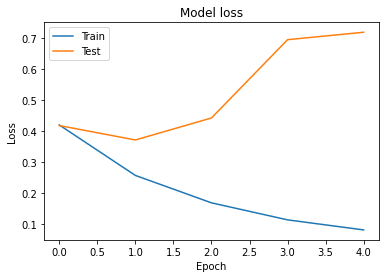

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

### 2. LSTM 텍스트 생성기 with Keras

LSTMs로 무엇을 할 수 있을까요? **시퀀스**를 분석하고 있기 때문에, 우리는 분류 이상의 것을 할 수 있습니다. 

다음 텍스트를 **생성**할 수 있습니다. 
**니체(Friedrich Nietzsche)의 글** 을 이용해서 실습을 해봅시다

Keras [LSTM text Generation](https://keras.io/zh/examples/lstm_text_generation/).

In [ ]:
# 라이브러리, 데이터 불러오기
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

corpus length: 600893
total chars: 57


In [ ]:
# max length를 이용하여 문자열의 크기 정렬
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 200285
Vectorization...


In [ ]:
# LSTM 모델 제작
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [ ]:
model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])

Epoch 1/60
1556/1565 [============================>.] - ETA: 0s - loss: 1.4330
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "s
of opposite kinds: in a remarkable sch"
s
of opposite kinds: in a remarkable scholorary of the subjection and problem of the part of the problem of the same to an experience of the consequently and the order to him and something and sentiment and standard of the consideration of the soul and a problem of the subjection and problem of the subjection and some will and a suprival and and subjection of the more and a subjection and struct and existence of the subjection of the co
----- diversity: 0.5
----- Generating with seed: "s
of opposite kinds: in a remarkable sch"
s
of opposite kinds: in a remarkable schopenhauer of the them of the certain and age is a god of certain every on the principle to be the and is the individual in the ancient the and fame and also the consequenced and cases and such a supreal, and a full for 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


as profound "wh
become would be also userwandne and and tastes easier is man": 
ediously out"ly distinent in thou
aipsical 
1565/1565 [==============================] - 66s 42ms/step - loss: 1.2828
Epoch 32/60
1557/1565 [============================>.] - ETA: 0s - loss: 1.2781
----- Generating text after Epoch: 31
----- diversity: 0.2
----- Generating with seed: "inted with solitude, and what is most po"
inted with solitude, and what is most power of the sense of the state of the same time that the considered that is the subject and contradictors of the state of the strength of the present and delight to the standarty of the subject, as the subject of the stark of the subject and actions and acts of the sense of the strength of the state of the state in the sense of the strength of the prosises of the strength of the most subject. there
----- diversity: 0.5
----- Generating with seed: "inted with solitude, and what is most po"
inted with solitude, and what is most powerful and sacrific

# Transfromer (심화 학습)
Attention이라는 개념을 사용하여 시계열 데이터를 처리하는 방법입니다. 위에서 배운 3가지의 개념은 모두 RNN을 기반으로 하고 있습니다. 문장에 여러가지 단어가 있으면 한 단어 한 단어를 신경망에 넣고 다음을 예측하는 시퀀스 처리 방식을 가지고 있다면, 이 Transformer/Attention은 문장을 한번에 넣는데, 순서정보를 입력해주는 것입니다.  "나는 머신러닝을 배우고 있다"라는 단어를 넣는다고 하면 "나는(0) 머신러닝을(1) 배우고(2) 있다(3)"을 넣어주고 처리하는 방식입니다. 이번 강의에서는 이 내용을 소개하진 않습니다. 그러나 시퀀스를 처리는 데 Transformer라는 개념이 사용된다는 것을 알고 넘어가는 것이 중요합니다.  시간이 있으신 분들은 이 개념을 배워두시면, 실무에 가셔서 바로 적용이 가능합니다. 이에 대한 [유튜브 강의](https://youtu.be/FeEmmylAF0o?t=310)를 소개합니다. GPT라는 Transformer를 기반으로한 네트워크에 대한 설명의 일부인데 수업 중에서는 이정도로만 알고 넘어가시면 되겠습니다. 


# Review

- <a href="#p1">Part 1: </a>
- <a href="#p2">Part 2: </a>  시퀀스 모델링에 사용된 신경망 예 + Keras를 사용하여 텍스트 생성 문제에 LSTM 적용

        - 시계열 데이터 (like Stock Prices, Weather, etc.)
        - Text Classification
        - Text Generation 등
    * LSTMs, GRU가 일반적으로 대부분의 문제에서 RNN보다 선호됩니다.
    * 최근에는 LSTM, RNN 외에도 Attention(Transformer)을 이용한 모델을 이용하여 시퀀스 데이터를 다루고 있습니다. 


     * 입력 데이터의 형태가 매우 중요
     * 훈련하는 데 시간이 다소 많이 걸림 
     * 영화 대본, 창작 업무에 사용가능 (GPT를 이용한 창작, 생각공유가 이슈가 되고 있음)



## 참고자료
- [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

- 음성을 텍스트로 변환시키는 기술 [LAS with attention 논문](https://https://arxiv.org/abs/1508.01211), [블로그 버전](https://https://kaen2891.tistory.com/30)
- 텍스트를 음성으로 변환하는 기술 [Tacotron 블로그](https://https://hcnoh.github.io/2018-12-11-tacotron)


